# Bag of Word Embeddings

In [16]:
import os

### this path is for when I was working on bridges

data_path = "/ocean/projects/mth240012p/shared/data"
print(os.listdir(data_path))


['.DS_Store', 'subject2', 'subject3', 'raw_text.pkl']


In [17]:
### looking at what the different podcasts/stories there are for subject2

subject2_path = os.path.join(data_path, "subject2")
print(os.listdir(subject2_path))

['stumblinginthedark.npy', 'singlewomanseekingmanwich.npy', 'theclosetthatateeverything.npy', 'jugglingandjesus.npy', 'threemonths.npy', 'escapingfromadirediagnosis.npy', 'wildwomenanddancingqueens.npy', 'igrewupinthewestborobaptistchurch.npy', 'undertheinfluence.npy', 'quietfire.npy', 'exorcism.npy', 'sweetaspie.npy', 'becomingindian.npy', 'whenmothersbullyback.npy', 'superheroesjustforeachother.npy', 'againstthewind.npy', 'indianapolis.npy', 'goingthelibertyway.npy', 'theshower.npy', 'bluehope.npy', 'adventuresinsayingyes.npy', 'seedpotatoesofleningrad.npy', 'lifereimagined.npy', 'backsideofthestorm.npy', 'thepostmanalwayscalls.npy', 'itsabox.npy', 'catfishingstrangerstofindmyself.npy', 'waitingtogo.npy', 'afearstrippedbare.npy', 'odetostepfather.npy', 'christmas1940.npy', 'haveyoumethimyet.npy', 'tildeath.npy', 'lifeanddeathontheoregontrail.npy', 'hangtime.npy', 'reachingoutbetweenthebars.npy', 'cocoonoflove.npy', 'findingmyownrescuer.npy', 'naked.npy', 'fromboyhoodtofatherhood.npy'

In [18]:
### looking at what the different podcasts/stories there are for subject3 (they appear to be the same)

subject3_path = os.path.join(data_path, "subject3")
print(os.listdir(subject3_path))

['stumblinginthedark.npy', 'singlewomanseekingmanwich.npy', 'theclosetthatateeverything.npy', 'jugglingandjesus.npy', 'threemonths.npy', 'escapingfromadirediagnosis.npy', 'wildwomenanddancingqueens.npy', 'igrewupinthewestborobaptistchurch.npy', 'undertheinfluence.npy', 'quietfire.npy', 'exorcism.npy', 'sweetaspie.npy', 'becomingindian.npy', 'whenmothersbullyback.npy', 'superheroesjustforeachother.npy', 'againstthewind.npy', 'indianapolis.npy', 'goingthelibertyway.npy', 'theshower.npy', 'bluehope.npy', 'adventuresinsayingyes.npy', 'seedpotatoesofleningrad.npy', 'lifereimagined.npy', 'backsideofthestorm.npy', 'thepostmanalwayscalls.npy', 'itsabox.npy', 'catfishingstrangerstofindmyself.npy', 'waitingtogo.npy', 'afearstrippedbare.npy', 'odetostepfather.npy', 'christmas1940.npy', 'haveyoumethimyet.npy', 'tildeath.npy', 'lifeanddeathontheoregontrail.npy', 'hangtime.npy', 'reachingoutbetweenthebars.npy', 'cocoonoflove.npy', 'findingmyownrescuer.npy', 'naked.npy', 'fromboyhoodtofatherhood.npy'

In [19]:
import sys
import os

# assuming you're in lab3-1/code, so the project root is one level up
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)


In [20]:
### Seeing the shape of the data for a single podcast/story for subject2

import numpy as np

# Example path (adjust based on the actual file name from os.listdir(subject2_path))
bold_path = os.path.join(subject2_path, "stumblinginthedark.npy")
Y = np.load(bold_path)

# Check the shape of Y
print("Shape of Y for subject2, story1:", Y.shape)

Shape of Y for subject2, story1: (489, 94251)


In [21]:
### this is just some small EDA on the actual response variable (voxel readings)

import numpy as np
import os

data_path = "/ocean/projects/mth240012p/shared/data"
subject2_path = os.path.join(data_path, "subject2")

# load fMRI data for one story
story = "theadvancedbeginner"
bold_path = os.path.join(subject2_path, f"{story}.npy")
Y = np.load(bold_path)

print("Shape of Y:", Y.shape)
print("First time point (first 5 voxels):", Y[0, :100])
print("Mean BOLD signal across voxels at time 0:", np.mean(Y[0, :]))
print("Mean BOLD signal across time for voxel 0:", np.mean(Y[:, 0]))

Shape of Y: (318, 94251)
First time point (first 5 voxels): [ 5.91624147e-01  1.43541799e+00 -6.22925169e-01 -3.18466548e-01
  1.20151892e+00  8.52418714e-01  1.04752168e+00 -2.69459514e-01
  4.12238682e-01  1.53930216e+00 -4.59067699e-01  2.82619995e+00
 -6.98701134e-01  6.12941000e-01 -9.74989866e-01  7.86056835e-01
 -2.63995124e-01  4.78363048e-01  7.97897029e-02 -1.54547417e+00
  2.36777178e+00  1.68225886e+00 -9.05753167e-01  1.03375164e+00
  1.09118455e+00  5.18079489e-01  1.05300532e+00 -1.93018924e+00
 -7.92172326e-01 -3.91906454e-01  5.27591095e-01 -2.15450754e-01
  2.65826760e+00 -1.35025026e+00  1.14502901e+00 -9.67223803e-01
  3.97556943e-01  9.28264054e-01  3.31218462e-01  2.36308955e-01
  4.82878717e-01 -1.18876020e-01 -2.28652235e-03  7.65383887e-01
  3.91159660e-01 -7.75584671e-01 -1.05773895e+00  8.29519016e-01
 -1.22492012e-01 -9.16097537e-01  7.09395208e-02 -1.79134262e+00
 -9.75005884e-01  1.30913421e-01  4.03840835e-01 -1.60802070e-01
  8.60414364e-01 -2.70113978e-

In [22]:
### Now actually getting around to using bag of words to summarize the podcasts/stories

import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# defining paths
data_path = "/ocean/projects/mth240012p/shared/data"
raw_text_path = os.path.join(data_path, "raw_text.pkl")
subject2_path = os.path.join(data_path, "subject2")

# loading raw text
with open(raw_text_path, 'rb') as f:
    raw_text = pickle.load(f)

# get list of stories (assuming raw_text is a dict with story names as keys)
stories = list(raw_text.keys())

# split stories into train and test sets per subject
train_stories, test_stories = train_test_split(stories, test_size=0.2, random_state=42)

# combine words from all training stories for total vocabulary
all_train_words = []
for story in train_stories:
    words = raw_text[story].data
    all_train_words.extend(words)

# fit vectorizer on all training words
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(all_train_words)
print("New vocab size:", len(vectorizer.vocabulary_))

# ----- 1. Generate BoW embeddings -----

word_vectors = {}
for story in train_stories + test_stories:
    words = raw_text[story].data
    word_bow = vectorizer.transform(words)
    word_vectors[story] = word_bow.toarray()
    print(f"Word-level BoW shape for {story}:", word_vectors[story].shape)

/var/tmp/ipykernel_31358/384807586.py:16: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  raw_text = pickle.load(f)


New vocab size: 10979
Word-level BoW shape for theadvancedbeginner: (1624, 10979)
Word-level BoW shape for superheroesjustforeachother: (1440, 10979)
Word-level BoW shape for seedpotatoesofleningrad: (1376, 10979)
Word-level BoW shape for mayorofthefreaks: (3274, 10979)
Word-level BoW shape for adollshouse: (1656, 10979)
Word-level BoW shape for cautioneating: (1587, 10979)
Word-level BoW shape for haveyoumethimyet: (2985, 10979)
Word-level BoW shape for ifthishaircouldtalk: (1854, 10979)
Word-level BoW shape for myfathershands: (942, 10979)
Word-level BoW shape for thecurse: (2054, 10979)
Word-level BoW shape for hangtime: (1927, 10979)
Word-level BoW shape for breakingupintheageofgoogle: (3476, 10979)
Word-level BoW shape for theclosetthatateeverything: (1928, 10979)
Word-level BoW shape for leavingbaghdad: (1976, 10979)
Word-level BoW shape for myfirstdaywiththeyankees: (2786, 10979)
Word-level BoW shape for itsabox: (1708, 10979)
Word-level BoW shape for golfclubbing: (1211, 10979)

In [23]:
### NOW USING THE DOWNSAMPLING SO THAT THE BAG OF WORDS MATCHES THE RESPONSE VARIABLE (NUMBER OF ROWS IS ADJUSTED)

# ----- 2. Downsample and trim -----

import sys
sys.path.append('./code')  # ensure preprocessing.py is accessible
from preprocessing import downsample_word_vectors

# downsample BoW embeddings
wordseqs = raw_text  
downsampled_bow = downsample_word_vectors(train_stories + test_stories, word_vectors, wordseqs)

# trim first 5 seconds and last 10 seconds
X_bow_trimmed = {}
for story in downsampled_bow:
    X_bow_trimmed[story] = downsampled_bow[story][5:-10, :]
    print(f"Trimmed BoW shape for {story}:", X_bow_trimmed[story].shape)

Trimmed BoW shape for theadvancedbeginner: (318, 10979)
Trimmed BoW shape for superheroesjustforeachother: (325, 10979)
Trimmed BoW shape for seedpotatoesofleningrad: (281, 10979)
Trimmed BoW shape for mayorofthefreaks: (475, 10979)
Trimmed BoW shape for adollshouse: (241, 10979)
Trimmed BoW shape for cautioneating: (279, 10979)
Trimmed BoW shape for haveyoumethimyet: (496, 10979)
Trimmed BoW shape for ifthishaircouldtalk: (249, 10979)
Trimmed BoW shape for myfathershands: (170, 10979)
Trimmed BoW shape for thecurse: (407, 10979)
Trimmed BoW shape for hangtime: (324, 10979)
Trimmed BoW shape for breakingupintheageofgoogle: (521, 10979)
Trimmed BoW shape for theclosetthatateeverything: (314, 10979)
Trimmed BoW shape for leavingbaghdad: (327, 10979)
Trimmed BoW shape for myfirstdaywiththeyankees: (358, 10979)
Trimmed BoW shape for itsabox: (355, 10979)
Trimmed BoW shape for golfclubbing: (201, 10979)
Trimmed BoW shape for odetostepfather: (404, 10979)
Trimmed BoW shape for gpsformylostid

In [24]:
### LAST STEP IS TO MAKE THE LAGGED VERSION
### FIRST QUARTER OF COLUMNS IS FOR 1 SECOND LAG, SECOND QUARTER IS FOR 2 SECOND, ETC

from preprocessing import make_delayed

# create lagged features for each story
X_bow_lagged = {}
for story in X_bow_trimmed:
    X_bow_lagged[story] = make_delayed(X_bow_trimmed[story], delays=range(1, 5))
    print(f"Lagged BoW shape for {story}:", X_bow_lagged[story].shape)

Lagged BoW shape for theadvancedbeginner: (318, 43916)
Lagged BoW shape for superheroesjustforeachother: (325, 43916)
Lagged BoW shape for seedpotatoesofleningrad: (281, 43916)
Lagged BoW shape for mayorofthefreaks: (475, 43916)
Lagged BoW shape for adollshouse: (241, 43916)
Lagged BoW shape for cautioneating: (279, 43916)
Lagged BoW shape for haveyoumethimyet: (496, 43916)
Lagged BoW shape for ifthishaircouldtalk: (249, 43916)
Lagged BoW shape for myfathershands: (170, 43916)
Lagged BoW shape for thecurse: (407, 43916)
Lagged BoW shape for hangtime: (324, 43916)
Lagged BoW shape for breakingupintheageofgoogle: (521, 43916)
Lagged BoW shape for theclosetthatateeverything: (314, 43916)
Lagged BoW shape for leavingbaghdad: (327, 43916)
Lagged BoW shape for myfirstdaywiththeyankees: (358, 43916)
Lagged BoW shape for itsabox: (355, 43916)
Lagged BoW shape for golfclubbing: (201, 43916)
Lagged BoW shape for odetostepfather: (404, 43916)
Lagged BoW shape for gpsformylostidentity: (326, 43916

In [25]:
### the names of each podcast/story, and the bag of word embeddings for each of them can be accessed via X_bow_lagged
X_bow_lagged.keys()

dict_keys(['theadvancedbeginner', 'superheroesjustforeachother', 'seedpotatoesofleningrad', 'mayorofthefreaks', 'adollshouse', 'cautioneating', 'haveyoumethimyet', 'ifthishaircouldtalk', 'myfathershands', 'thecurse', 'hangtime', 'breakingupintheageofgoogle', 'theclosetthatateeverything', 'leavingbaghdad', 'myfirstdaywiththeyankees', 'itsabox', 'golfclubbing', 'odetostepfather', 'gpsformylostidentity', 'exorcism', 'waitingtogo', 'theinterview', 'dialogue6', 'forgettingfear', 'dialogue5', 'shoppinginchina', 'swimmingwithastronauts', 'singlewomanseekingmanwich', 'comingofageondeathrow', 'howtodraw', 'canplanetearthfeedtenbillionpeoplepart2', 'learninghumanityfromdogs', 'eyespy', 'bluehope', 'cocoonoflove', 'dialogue3', 'dialogue2', 'stumblinginthedark', 'listo', 'canplanetearthfeedtenbillionpeoplepart1', 'indianapolis', 'againstthewind', 'thefreedomridersandme', 'wheretheressmoke', 'jugglingandjesus', 'mybackseatviewofagreatromance', 'buck', 'findingmyownrescuer', 'threemonths', 'theshowe

# Part 2: Modeling for BoW

In [ ]:
# ---------- Imports ----------
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

# ---------- Paths ----------
data_path = "/ocean/projects/mth240012p/shared/data"
subject2_path = os.path.join(data_path, "subject2")
save_dir = os.path.join("..", "results")
os.makedirs(save_dir, exist_ok=True)

# ---------- Robust z-scoring ----------
def zs(v):
    std = v.std(0)
    std[std < 1e-8] = 1.0
    return (v - v.mean(0)) / std

# ---------- Load and align data ----------
def prepare_bow_and_bold(X_dict, story_list, subject_path):
    X_all, Y_all = [], []
    for story in story_list:
        if story not in X_dict:
            continue
        bold_path = os.path.join(subject_path, f"{story}.npy")
        if not os.path.exists(bold_path):
            print(f"Missing Y for: {story}")
            continue
        Y = np.load(bold_path)
        X = X_dict[story]
        min_len = min(X.shape[0], Y.shape[0])
        X, Y = X[:min_len], Y[:min_len]
        mask = ~np.isnan(Y).any(axis=1)
        X_all.append(X[mask])
        Y_all.append(Y[mask])
    return np.vstack(X_all), np.vstack(Y_all)

X_train, Y_train = prepare_bow_and_bold(X_bow_lagged, train_stories, subject2_path)
X_test, Y_test = prepare_bow_and_bold(X_bow_lagged, test_stories, subject2_path)

# ---------- Drop constant columns ----------
def remove_constant_columns(X_train, X_test, threshold=1e-8):
    stds = X_train.std(axis=0)
    mask = stds > threshold
    return X_train[:, mask], X_test[:, mask]

X_train, X_test = remove_constant_columns(X_train, X_test)

# ---------- Z-score ----------
X_train_z, Y_train_z = zs(X_train), zs(Y_train)
X_test_z, Y_test_z = zs(X_test), zs(Y_test)

print(f"X_train: {X_train_z.shape}, Y_train: {Y_train_z.shape}")
print(f"X_test:  {X_test_z.shape}, Y_test:  {Y_test_z.shape}")


Missing Y for: myfirstdaywiththeyankees
Missing Y for: dialogue6
Missing Y for: dialogue5
Missing Y for: dialogue3
Missing Y for: dialogue2
Missing Y for: dialogue1


In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100.0)
ridge.fit(X_train_z, Y_train_z)  # fit model

Ridge(alpha=100.0)

In [14]:
from scipy.stats import pearsonr

Y_pred = ridge.predict(X_test_z)

ccs = np.array([
    np.corrcoef(Y_test_z[:, i], Y_pred[:, i])[0, 1]
    if not np.isnan(Y_test_z[:, i]).any() else 0
    for i in range(Y_test_z.shape[1])
])

print("BoW Ridge Results:")
print(f"Mean CC: {np.mean(ccs):.4f}")
print(f"Median CC: {np.median(ccs):.4f}")
print(f"Top 1% CC: {np.percentile(ccs, 99):.4f}")
print(f"Top 5% CC: {np.percentile(ccs, 95):.4f}")

BoW Ridge Results:
Mean CC: 0.0017
Median CC: 0.0016
Top 1% CC: 0.0329
Top 5% CC: 0.0234


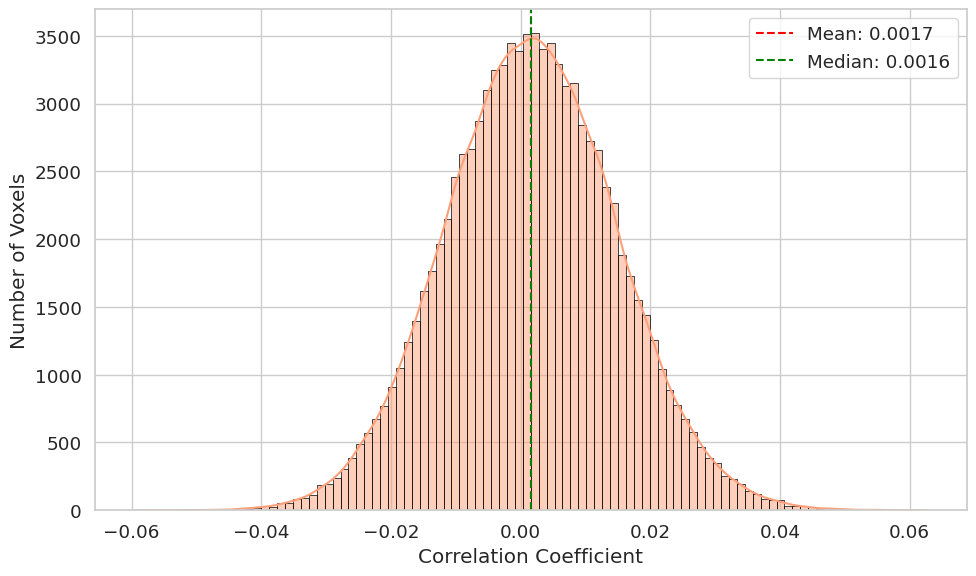

In [15]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.histplot(ccs[~np.isnan(ccs)], bins=100, kde=True, color="#FFA07A", edgecolor="black")
plt.axvline(np.mean(ccs), color="red", linestyle="--", label=f"Mean: {np.mean(ccs):.4f}")
plt.axvline(np.median(ccs), color="green", linestyle="--", label=f"Median: {np.median(ccs):.4f}")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Number of Voxels")
plt.legend()
plt.tight_layout()

plot_path = os.path.join(save_dir, "cc_distribution_bow_customridge.png")
plt.savefig(plot_path, dpi=300)
plt.show()

In [ ]:
# HAVING TROUBLE WITH THSI PART...
model_path = os.path.join(save_dir, "ridge_bow.pkl")
with open(model_path, "wb") as f:
    pickle.dump(ridge, f)

print(f"Model saved to: {model_path}")